# Machine Learning Project
### Student Performance Data
##### Jean-Luc Adam

## Part 1: Data Selection

Data chosen is Student data containing 1000 entries of student descriptors and scores. The columns are gender, race/ethnicity, parental level of education, lunch, test preparation course,	math score,	reading score, writing score. 

In [46]:
import pandas as pd
df = pd.read_csv('/Users/Jean-Luc/Documents/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Part 2: Checking and Cleaning Data

Data contains no missing values
I'm dropping race/ethnicity not only becuase I don't want to touch that subject, but also because the entries have replacement group names without a key, so if I were to use it, I would not be able to draw any conclusions anyway.
In addition, I added a column made of the averges of the scores.

In [47]:
df['average'] = df.mean(numeric_only=True, axis=1)
df.drop(['race/ethnicity'], axis=1, inplace=True)
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,bachelor's degree,standard,none,72,72,74,72.666667
1,female,some college,standard,completed,69,90,88,82.333333
2,female,master's degree,standard,none,90,95,93,92.666667
3,male,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,some college,standard,none,76,78,75,76.333333


## Part 3: Exploritory Data Analysis

### ECDF Analysis

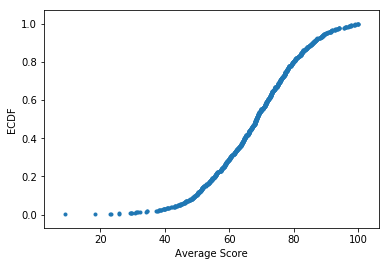

In [56]:
import numpy as np
# define the function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# imput the average score
x, y = ecdf(df['average'])
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.07)
_ = plt.xlabel('Average Score')
_ = plt.ylabel('ECDF')

# display the plot
plt.show()

From this ECDF plot, I can visualize the distribution of the scores and see that most people got above a 50%, which tells me that they were tested on subjects that they all had some form of previous knowledge on, such as a benchmark test.

### Mean, Median, and Standard Deviation

In [60]:
mean_math = np.mean(df['math score'])
median_math = np.median(df['math score'])
std_math = np.std(df['math score'])
mean_reading = np.mean(df['reading score'])
median_reading = np.median(df['reading score'])
std_reading = np.std(df['reading score'])
mean_writing = np.mean(df['writing score'])
median_writing = np.median(df['writing score'])
std_writing = np.std(df['writing score'])
print('Mean Math Score: {}'.format(mean_math))
print('Median Math Score: {}'.format(median_math))
print('Standard Deviation Math Score: {}'.format(std_math))
print('Mean Reading Score: {}'.format(mean_reading))
print('Median Reading Score: {}'.format(median_reading))
print('Standard Deviation Reading Score: {}'.format(std_reading))
print('Mean Writing Score: {}'.format(mean_writing))
print('Median Writing Score: {}'.format(median_writing))
print('Standard Deviation Writing Score: {}'.format(std_writing))

Mean Math Score: 66.089
Median Math Score: 66.0
Standard Deviation Math Score: 15.155496659628165
Mean Reading Score: 69.169
Median Reading Score: 70.0
Standard Deviation Reading Score: 14.59289001534652
Mean Writing Score: 68.054
Median Writing Score: 69.0
Standard Deviation Writing Score: 15.188057281956757


Since the mean is less than the median for the math score, the data is slightly left-skewed. The opposite is true for Reading and Writing, making them right-skewed. Since they are only slightly different (only around 1% in each case), this is an insignificant observation.

### Boxplot

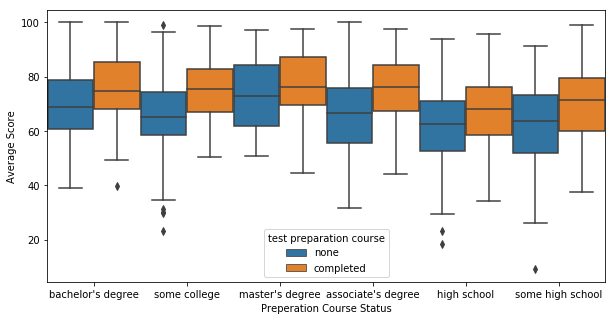

In [51]:
import seaborn as sns
from matplotlib import pyplot
pyplot.subplots(figsize=(10,5))
sns.boxplot(x='parental level of education', y='average', width=1, hue='test preparation course', data=df)
plt.xlabel('Preperation Course Status')
plt.ylabel('Average Score')
plt.show()

From this boxplot, it seems i can draw the conclusion that those who took the test prep course did better on the tests than those who did not, as well as a possible correlation between parent's level of education and test score.

## Part 4: Hypothesis Test, Feature Engineering, & Model selection

### Hypothesis test

For my hypothesis, I would like to explore the extent to which the test preperation course affected the student's average test scores.

In [64]:
#Splitting my dataframe in 2, the first only including scores without a preperation course, the second without.
df1 = df[df['test preparation course'] == 'none']
df1.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,bachelor's degree,standard,none,72,72,74,72.666667
2,female,master's degree,standard,none,90,95,93,92.666667
3,male,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,some college,standard,none,76,78,75,76.333333
5,female,associate's degree,standard,none,71,83,78,77.333333


In [65]:
df2 = df[df['test preparation course'] == 'completed']
df2.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
1,female,some college,standard,completed,69,90,88,82.333333
6,female,some college,standard,completed,88,95,92,91.666667
8,male,high school,free/reduced,completed,64,64,67,65.000000
13,male,some college,standard,completed,78,72,70,73.333333
18,male,master's degree,free/reduced,completed,46,42,46,44.666667


In [66]:
# permutation function pulled from lecture, edited
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [94]:
# more functions from lectures, edited
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [95]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [96]:
A_B_diff_means = diff_of_means(df1['average'], df2['average'])
print(A_B_diff_means)

# Acquire 10,000 permutation replicates of difference in mean from before and after strategy: perm_replicates
perm_replicates = draw_perm_reps(df1, df2, diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= A_B_diff_means)/ len(perm_replicates)
print('p-val = {0:.6f}'.format(p))
#'{0:.2f}'.format(pi)

-7.630519152787173


TypeError: must be str, not int

I could not for the life of me understand why this wanted a string and not an int, when the difference function is made to return an int

### Feature Engineering, & Model selection

For my features I will be using test preperation course and lunch stauts, as those are the most interesting to me and in my opinion are the most likely to show results. I will be using a logistic regression model because both of the features are basically yes/ no options.